In [8]:
import sympy as sp
from sympy import lambdify
import numpy as np
import matplotlib.pyplot as plt

class FEMBasis(object):
    """This is gonna be my class for all the basis functions"""
    def __init__(this, x, N):
        """Takes a sympy symbol and the 1-D Mesh size, higher dimensions can be created via Kronecker delta product"""
        if isinstance(x, sp.Symbol):
            h = sp.Rational(1, N-1)
        else:
            h = 1.0/(N-1)
        this.points = [i*h for i in range(N)]
        this.psi = [this.Lagrange_polynomial(x, i, this.points) for i in range(N)]
        this.lam_psi = [] ## convert all them sympy expressions into sweet organic lambdas
        for i in range(0,len(this.psi)):
            this.lam_psi.append(lambdify(x, this.psi[i], modules=['numpy']))
        this.lam_dpsi = [] ## again but the derivatives
        for i in range(0,len(this.psi)):
            this.lam_dpsi.append(lambdify(x, sp.diff(this.psi[i]), modules=['numpy']))


        
    def Lagrange_polynomial(this, x, i, points):
        """Makes the Lagrange polynomial specified"""
        p = 1
        for k in range(len(points)):
            if k != i:
                p *= (x - points[k])/(points[i] - points[k])
        return p

In [9]:
x = sp.symbols('x')
myFEM = FEMBasis(x,5)

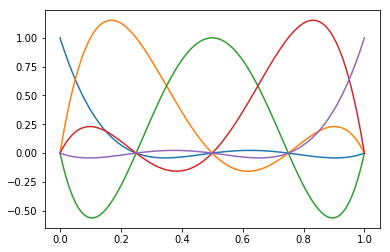

In [11]:
x_i = np.linspace(0,1,100)
plt.plot(x_i,myFEM.lam_psi[0](x_i))
plt.plot(x_i,myFEM.lam_psi[1](x_i))
plt.plot(x_i,myFEM.lam_psi[2](x_i))
plt.plot(x_i,myFEM.lam_psi[3](x_i))
plt.plot(x_i,myFEM.lam_psi[4](x_i))

plt.show()